# CycleGAN 훈련

*Note: 라이브러리 버전 때문에 책의 내용과 결과가 다를 수 있습니다*

## 라이브러리 임포트

*Note: 이 노트북의 코드를 실행하려면 `keras_contrib` 패키지를 설치해야 합니다. 다음 셀의 주석을 제거하고 실행하여 패키지를 설치하세요*

In [1]:
#!pip install git+https://www.github.com/keras-team/keras-contrib.git

In [2]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

Using TensorFlow backend.
/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/haesun/github/GDL_co

In [3]:
# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

## 데이터 적재

노트북을 처음 실행할 때 다음 셀의 주석을 제거하고 실행하여 사과, 오렌지 데이터셋을 다운로드하세요.

In [4]:
#!./scripts/download_cyclegan_data.sh apple2orange

In [5]:
IMAGE_SIZE = 128

In [6]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

## 모델 생성

In [7]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0912 14:24:18.277144 140587907692352 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 14:24:18.285815 140587907692352 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 14:24:18.287797 140587907692352 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0912 14:24:18.400809 140587907692352 deprecation_wrapper.py:119] From /home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat

In [8]:
gan.g_BA.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 64, 64, 32)   1568        input_4[0][0]                    
__________________________________________________________________________________________________
instance_normalization_14 (Inst (None, 64, 64, 32)   0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 64, 64, 32)   0           instance_normalization_14[0][0]  
__________________________________________________________________________________________________
conv2d_20 

In [9]:
gan.g_AB.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 64, 64, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
instance_normalization_7 (Insta (None, 64, 64, 32)   0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 32)   0           instance_normalization_7[0][0]   
__________________________________________________________________________________________________
conv2d_12 

In [10]:
gan.d_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_1 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       131200    
__________

In [11]:
gan.d_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_4 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       131200    
__________

## 모델 훈련

*Note: CycleGAN 훈련 도중 주피터 커널이 예기치 않게 종료될 수 있습니다. 이럴 때는 쉘에서 05_01_cyclegan_train.py 파일을 실행하여 훈련하세요.*

In [12]:
BATCH_SIZE = 1
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

*Note: 이 훈련은 시간이 매우 오래 걸립니다. 깃허브에 훈련된 가중치와 손실이 저장되어 있으므로 훈련을 건너 뛰고 다음 셀을 실행해도 됩니다.*

In [ ]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)

## 결과

![apple2orange](run/paint/0001_apple2orange/images/0_199_990.png)

## 손실

*Note: 앞에서 훈련을 직접 실행하지 않았다면 다음 셀의 주석을 제거하고 실행하세요*

In [ ]:
#!gunzip run/paint/0001_apple2orange/loss.pkl.gz

In [13]:
# import pickle

# loss = pickle.load(open(os.path.join(RUN_FOLDER, "loss.pkl"), "rb"))

# gan.d_losses = loss['d_losses']
# gan.g_losses = loss['g_losses']

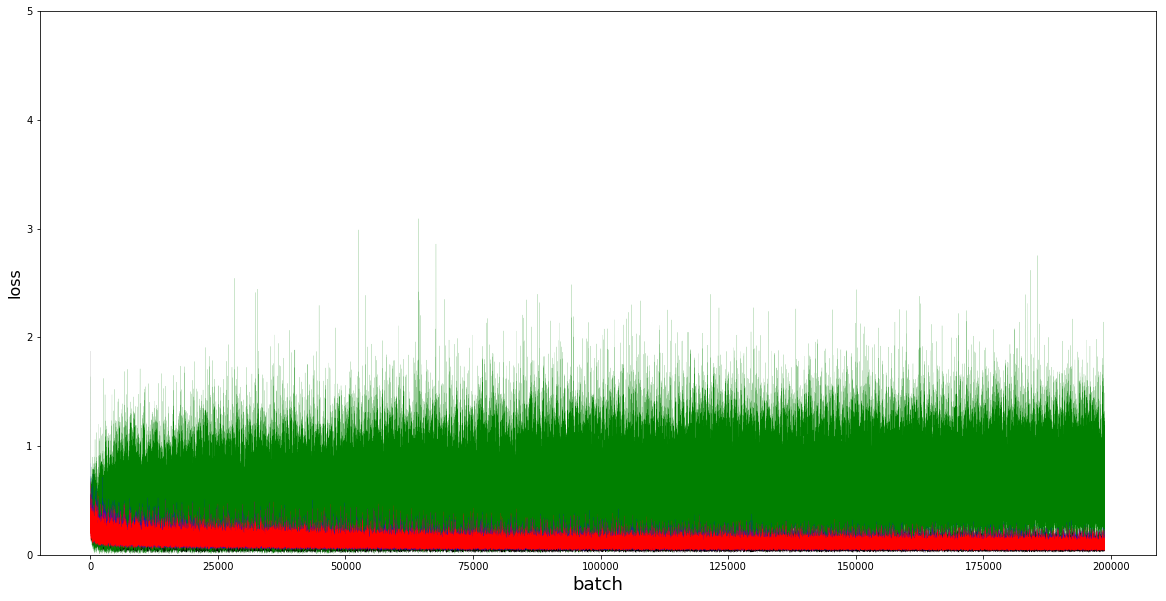

In [14]:
fig = plt.figure(figsize=(20,10))

# plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.1) #discriminator loss

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #validation loss
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)

plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #reconstr loss
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.1) #id loss
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()